## Social Media Targeted Ad Analysis

### Introduction

**When it comes to social media ads, every company tries to get the most customers they can with the least amount of spend. In order to achieve this goal, it is important to analyse data from current social ad campaigns to answer the following questions.**

* **What current social ad campaigns are effective at conversions?**
* **Does the current ad spend correlate with consumers buying the product?**
* **What demographics respond well to the current social ad campaigns?**

**In this Visual Data Analysis, we examine a dataset from an anonymous company’s Facebook ad campaign. The data file can be downloaded from [here](https://www.kaggle.com/loveall/clicks-conversion-tracking). The anonymous company is refered to as `company xyz` in this dataset. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.**

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

### Data Wrangling

**Import necessary libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the raw data.**

In [2]:
df = pd.read_csv('KAG_conversion_data.csv')

**Check the information.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


**Above, none of the rows have null values.**

**Below, make copy of dataframe before wrangling.**

In [4]:
df_c = df.copy()

**Check the first five rows of the dataframe.**

In [5]:
df_c.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**Above, the xyz_campaign_id, which shows the different campaign id's of company xyz's ad campaigns is in integer format. Since we are trying to see which campaign is most effective of
company xyz in getting customers, we will change the different integers into 'campaign a','campaign b','campaign c' etc to make the data more readable.**

**Below, get unique xyz_campaign_id values.**

In [6]:
df_c.xyz_campaign_id.unique()

array([ 916,  936, 1178])

**Above, there are three unique integer values for xyz_campaign_id campaign. We will need to make a function to change those values to 'campaign A', 'campaign B', 'campaign C'.**

**Below, make function to change xyz_campaign_id column integer values to a more readable format.**

In [7]:
def campaign_id(data):
    if data==916:
        return 'campaign A'
    elif data==936:
        return 'campaign B'
    elif data==1178:
        return 'campaign C'
    else:
        return data

**Apply function to to change values in xyz_campaign_id column.**

In [8]:
df_c['xyz_campaign_id'] = df_c['xyz_campaign_id'].apply(campaign_id)

**Check the new values of xyz_campaign_id column.**

In [9]:
df_c['xyz_campaign_id']

0       campaign A
1       campaign A
2       campaign A
3       campaign A
4       campaign A
           ...    
1138    campaign C
1139    campaign C
1140    campaign C
1141    campaign C
1142    campaign C
Name: xyz_campaign_id, Length: 1143, dtype: object

**Check if any values in columns ad_id are duplicated.**

In [76]:
df_c.ad_id.duplicated().sum()

0

**Above, none of the values in the ad_id column have been duplicated which means that 1143 different ad_ids were part of just 3 campaigns for company xyz.**

**Use describe() function to glance the overall range of data.**

In [77]:
df_c.describe()

,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPM,CVR,CPTC
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1140.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.016420,0.239387,0.025251,inf
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.011506,0.160908,0.071205,NaN
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.010022,0.148742,0.001212,1.405000
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.015981,0.248816,0.003070,8.470000
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,0.023364,0.332700,0.016941,22.060833
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.105932,1.504237,1.149425,inf


**Above, none of the data stands out as being erroneous. However, the Total_Conversion column min value is 0. We will have to watch out for infinite values when we make the cost per total conversion column below.**

**Below, make columns with 'CTR','CPM', 'CVR', 'CPT' values.**

In [14]:
#Make column for click through rate.
df_c['CTR'] = (df_c['Clicks']/df_c['Impressions'])*100
#Make column for cost per mille (thousand).
df_c['CPM'] = (df_c['Spent']/df_c['Impressions'])*1000
#Make column for conversion rate.
df_c['CVR'] = (df_c['Total_Conversion']/df_c['Impressions'])*100
#Make column for cost per total conversion
df_c['CPTC'] = df_c['Spent']/df_c['Total_Conversion']

**Check new columns.**

In [15]:
df_c[['CTR','CPM','CVR','CPTC']].head()

,CTR,CPM,CVR,CPTC
0,0.013605,0.194558,0.027211,0.715
1,0.011198,0.101898,0.011198,0.910
2,0.000000,0.000000,0.144300,0.000
3,0.023480,0.293496,0.023480,1.250
4,0.024195,0.312122,0.024195,1.290


**Check for infinite values in the 'CPT' (Cost Per Total Conversion) column.**

In [16]:
df_c[np.isinf(df_c['CPTC'])]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPM,CVR,CPTC
221,776476,campaign B,115510,30-34,M,16,43756,5,5.440000,0,0,0.011427,0.124326,0.0,inf
655,1121352,campaign C,144582,35-39,M,25,368986,59,100.289999,0,0,0.015990,0.271799,0.0,inf
866,1121820,campaign C,144660,30-34,F,28,11471,1,1.570000,0,0,0.008718,0.136867,0.0,inf
981,1122146,campaign C,144714,40-44,F,32,319501,79,111.650000,0,0,0.024726,0.349451,0.0,inf
990,1122182,campaign C,144720,40-44,F,7,40801,12,15.920000,0,0,0.029411,0.390187,0.0,inf


**Above, there are 5 infinite values in the 'CPT' column. 5 ad_ids out of 1143 is not alot. We will make a sub dataframe df_c_sub to filter out these rows.**

**Below, make df_c_sub filtering out rows with infinity values.**

In [78]:
df_c_sub = df_c[~np.isinf(df_c['CPTC'])]

**Check if any rows have infinite values**

In [18]:
np.isinf(df_c_sub['CPTC']).any().sum()

0

### Visual Data Exploration

**Make bar chart showing the count of Targeted Ad IDs by Age and Gender.**

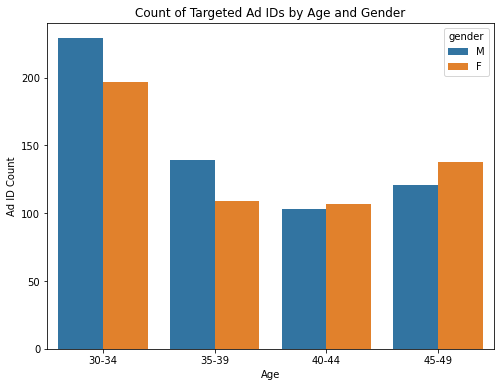

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'age', data = df_c, hue = 'gender')
plt.title('Count of Targeted Ad IDs by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Ad ID Count')
plt.show()

**Above, people age 30-34 had more ads targeted towards them than any other age group. People age 40-44 had the least amount of ads targeting towards them. Although a little more ads were targeted towards males, there isn't a huge difference in the amount of ads target towards males vs females.**

**Below, make bar chart showing the count of Targeted Ad IDs by Campaign IDs and Gender.**

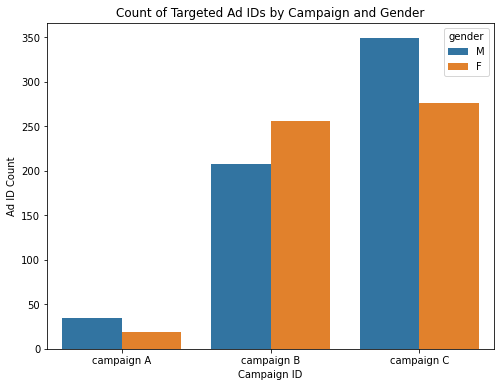

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'xyz_campaign_id', data = df_c, hue = 'gender')
plt.title('Count of Targeted Ad IDs by Campaign and Gender')
plt.xlabel('Campaign ID')
plt.ylabel('Ad ID Count')
plt.show()

**Above, of the 1143 Ad IDs in the df_c dataframe, half of them were part of campaign C. Less than 10 percent of the Ad IDs were part of campaign A. More males than females were targeted for campaign A and C, while more females than males were targeted for campaign B.**

**Below, make heatmap exploring possible correlations between'Impressions','Clicks','Spent','Total_Conversion', and 'Approved_Conversion'**

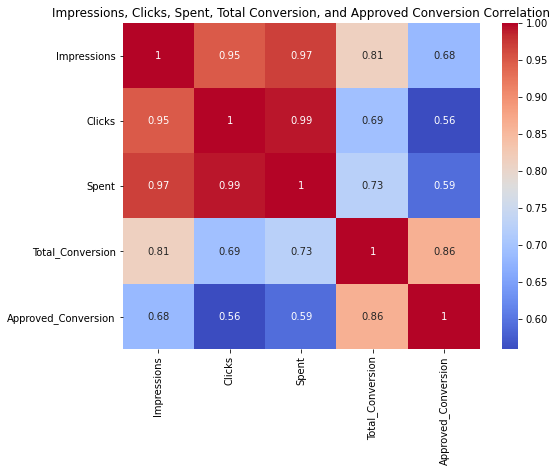

In [21]:
plt.figure(figsize=(8,6))
df_c_corr_1 = df_c[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']]
ax = sns.heatmap(df_c_corr_1.corr(), annot=True, cmap= 'coolwarm')
plt.title('Impressions, Clicks, Spent, Total Conversion, and Approved Conversion Correlation')
plt.show()

**Above, there is a very high correlation (0.99) between ad spend by company xyz and clicks. There is also a very high correlation (0.97) between ad spend and impressions. There is a lower correlation between ad spend and Total Conversions (0.81). There is a low correlation between ad spend and Approved Conversions. Company xyz's social ads are good at getting impressions and clicks, but they are not as effective in making consumers actually buy products.**

**Below, make heatmap exploring possible correlations between 'CTR','CPM','CVR', and 'CPTC'**

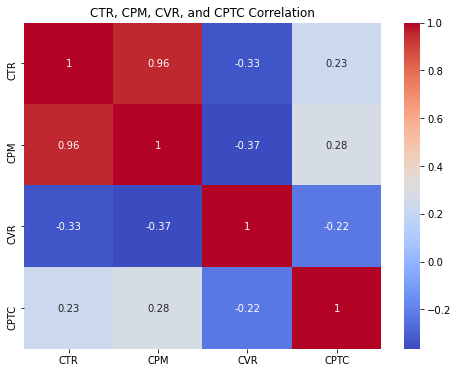

In [37]:
plt.figure(figsize=(8,6))
#use df_c_sub dataset
df_c_corr_2 = df_c_sub[['CTR','CPM','CVR','CPTC']]
sns.heatmap(df_c_corr_2.corr(), annot=True, cmap= 'coolwarm')
plt.title('CTR, CPM, CVR, and CPTC Correlation')
plt.show()

**Above, there is a high correlation between Cost Per Mille(Thousand) and Click Through Rate (0.96). But in general there is a low correlation between Click Through Rate, Cost Per Mille(Thousand), Conversion Rate and Cost Per Total Conversion.**

**Below, make bar chart examing the average CPM of ads by age and gender.**

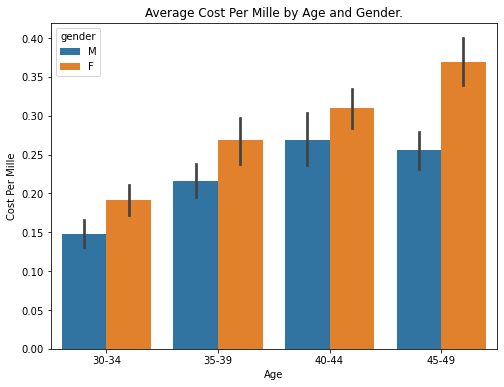

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'age', y = 'CPM', hue= 'gender', data = df_c)
plt.xlabel('Age')
plt.ylabel('Cost Per Mille')
plt.title('Average Cost Per Mille by Age and Gender.')
plt.show()

**Above, the CPM is highest amongst the 45-49 age group. Females in this dataset have a higher CPM than males.**

**Below, make box plot examing the mean CTR of ads by age and gender.**

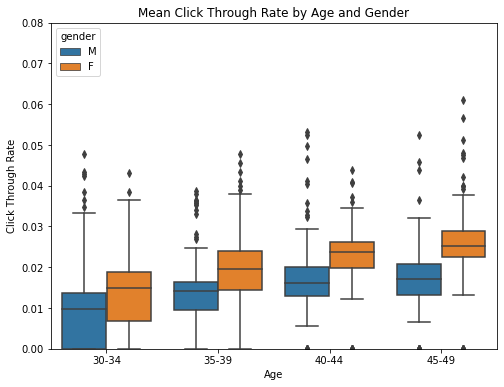

In [34]:
base_color=sns.color_palette()[0]
plt.figure(figsize=(8,6))
sns.boxplot(data = df_c, x = 'age', y = 'CTR', hue='gender')
plt.title('Mean Click Through Rate by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Click Through Rate')
plt.ylim(0,0.08)
plt.show()

**Above, the CTR is the highest amongst the 45-49 age group. Females in this dataset have a higher CTR than males. Like the heatmap, it shows that high CPM costs are correlated with a higher Click Through Rate for Company xyz's ad campaigns.**

**Below, make barplot examing the average CTR of ads by Campaign ID.**

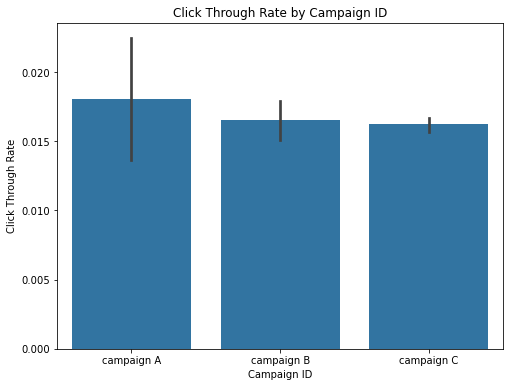

In [84]:
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
sns.barplot(data = df_c, x = 'xyz_campaign_id', y = 'CTR', color = base_color)
plt.title('Click Through Rate by Campaign ID')
plt.xlabel('Campaign ID')
plt.ylabel('Click Through Rate')
plt.show()

**Above, Campaign A has the highest Click Through Rate.**

**Below, make barplot examing the average Cost Per Total Conversion by Campaign ID and Gender.**

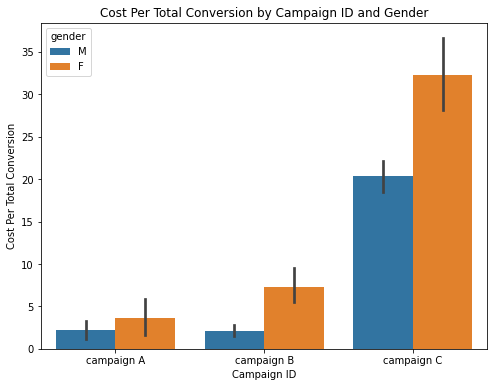

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(data = df_c_sub, x = 'xyz_campaign_id', y = 'CPTC', hue='gender')
plt.title('Cost Per Total Conversion by Campaign ID and Gender')
plt.xlabel('Campaign ID')
plt.ylabel('Cost Per Total Conversion')
plt.show()

**Above, the Cost Per Total Conversion is lowest for campaign A. The Cost Per Total Conversion is highest for campaign A. The CPTC is higher for females than males. Therefore, it is more expensive to get females interested in company xyz's product.**

**For this dataset the number of customers actually buying the product is shown in Approved Conversion. Below, make scatterplot examining the correlation between Spend and Approved Conversion.**

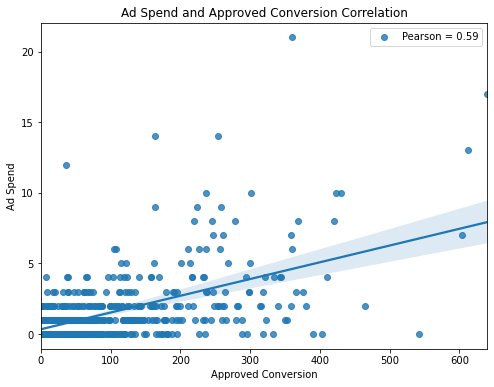

In [46]:
from scipy.stats import pearsonr
r, pvalue = pearsonr(df_c['Spent'],df_c['Approved_Conversion'])
plt.figure(figsize=(8,6))
sns.regplot(data=df_c, x='Spent', y='Approved_Conversion', label=f'Pearson = {r:.2f}')
plt.legend()
plt.title('Ad Spend and Approved Conversion Correlation')
plt.xlabel('Approved Conversion')
plt.ylabel('Ad Spend')
plt.show()

**Above, there is a moderate correlation (0.59) between Ad Spend and Approved Conversion for company xyz.**

**Below, make bar chart examining Cost Per Approved Conversions by campaign id.**

In [51]:
#make new dataframe with CPA groupby xyz_campaign_id
df_cpa_id = df_c.groupby('xyz_campaign_id').sum()[['Spent','Approved_Conversion']]
df_cpa_id['CPA']=df_cpa_id['Spent']/df_cpa_id['Approved_Conversion']

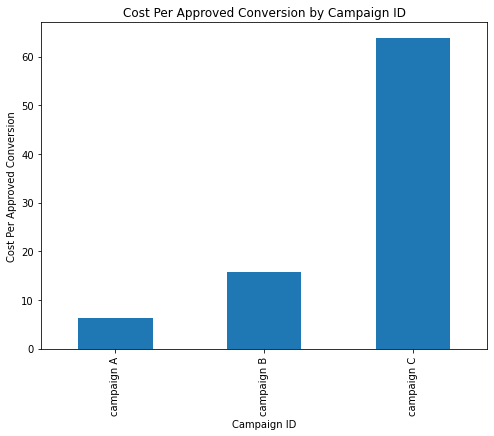

In [60]:
plt.figure(figsize=(8,6))
df_cpa_id['CPA'].plot(kind='bar', title = 'Cost Per Approved Conversion by Campaign ID', xlabel = 'Campaign ID', ylabel='Cost Per Approved Conversion')
plt.show()

**Above, Campaign A had the lowest Cost Per Approved Conversion. Campaign C had the highest Cost Per Approved Conversion. Campaign A was the most effective at making consumers buy with the lowest cost.**

**Below, make bar chart examining Cost Per Approved Conversions by gender.**

In [63]:
#make new dataframe with CPA groupby gender
df_cpa_gender = df_c.groupby('gender').sum()[['Spent','Approved_Conversion']]
df_cpa_gender['CPA']=df_cpa_gender['Spent']/df_cpa_gender['Approved_Conversion']

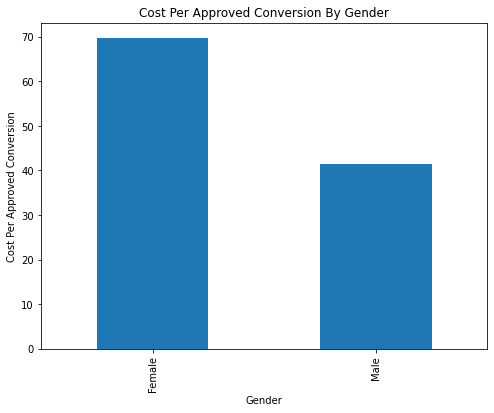

In [73]:
plt.figure(figsize=(8,6))
ax02 = df_cpa_gender['CPA'].plot(kind='bar')
labels = [item.get_text() for item in ax02.get_xticklabels()]
labels[0] = 'Female'
labels[1] = 'Male'
ax02.set_title('Cost Per Approved Conversion By Gender')
ax02.set_xlabel('Gender')
ax02.set_ylabel('Cost Per Approved Conversion')
ax02.set_xticklabels(labels)
plt.show()

**Cost Per Approved Conversions are much higher amongst Females than Males.**

**Below, make bar chart examining Cost Per Approved Conversions by Age.**

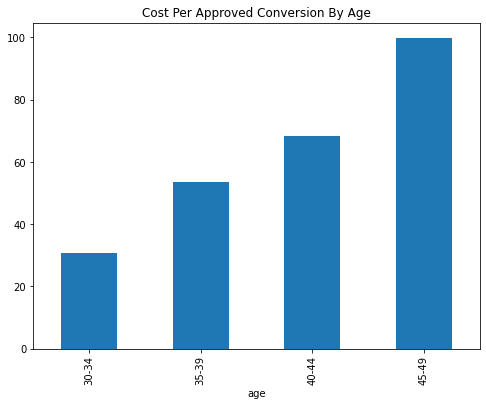

In [83]:
#make new dataframe with CPA groupby age
plt.figure(figsize=(8,6))
df_cpa_age = df_c.groupby('age').sum()[['Spent','Approved_Conversion']]
df_cpa_age['CPA']=df_cpa_age['Spent']/df_cpa_age['Approved_Conversion']
ax02.set_title('Cost Per Approved Conversion By Gender')
df_cpa_age['CPA'].plot(kind='bar')
plt.title('Cost Per Approved Conversion By Age')
plt.show()

**Cost Per Approved Conversions is highest amongst ages 45 - 49. Cost Per Approved Conversions is lowest amongst ages 30-34.**

### Conclusion

* **For company xyz, there is a very high correlation between ad spend, clicks and impressions.**
* **However, there is a moderate correlation between ad spend and Approved Conversions (targeted people who actually buy products).**
* **Segmented by age, while people ages 30 - 34 are less likely to click an ad, once they click, they are more likely to buy products from company xyz.**
* **On the contrary, while people ages 45-49 are more likely to click an ad, once they click, they are less likely to buy products**
* **Segmented by Ad Campaign, campaign A had by far the lowest Cost Per Total Conversion and Cost Per Approved Conversion.**
* **Segmented by Gender, Females had much higher Cost Per Approved Conversion than Males.**

**With the facts above, in this dataset, company xyz should target more potential customers with campaign A as it brought the most paying customers than the other two campaigns. Also, to get more customers with the least ad spend, they should target more males and people in the 30-34 age range.**